## Python Basic

In [1]:
a = 3 
b = 2
a + b

5

## Requests GET

In [2]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [6]:
#res.text

In [5]:
import requests
res = requests.get('http://www.twse.com.tw/fund/BFI82U?response=json&dayDate=&weekDate=&monthDate=&type=day&_=1548297374422')
#res.text

## Pytesseract

In [7]:
! pip install pytesseract

  Running setup.py bdist_wheel for pytesseract: started
  Running setup.py bdist_wheel for pytesseract: finished with status 'done'
  Stored in directory: C:\Users\stu\AppData\Local\pip\Cache\wheels\d5\90\56\ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg')
with open('kaptcha.jpg', 'wb') as f:
    f.write(res.content)

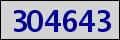

In [9]:
from PIL import Image
Image.open('kaptcha.jpg')

In [11]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract.exe'

print(pytesseract.image_to_string(Image.open('kaptcha.jpg')))

304643


## 買賣日報

In [23]:
import requests
from bs4 import BeautifulSoup
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'lxml')
payload = dict([(e.get('name'), e.get('value')) for e in soup.select('input[type=hidden]')])

In [24]:
payload.update({
'RadioButton_Normal': 'RadioButton_Normal',
'TextBox_Stkno': '2454',
#'CaptchaControl1': 'GQZLE',
'btnOK': '查詢'       
})

res = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)

In [25]:
res = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
print(res.text)

券商買賣股票成交價量資訊
股票代碼,="2454"
序號,券商,價格,買進股數,賣出股數,,序號,券商,價格,買進股數,賣出股數
1,1020合　　庫,238.00,1000,1000,,2,1020合　　庫,239.50,3000,0 
3,1020合　　庫,240.00,1000,0,,4,1020合　　庫,240.50,1000,3000 
5,1020合　　庫,241.00,0,1100,,6,1021合庫台中,237.00,2000,0 
7,1021合庫台中,237.50,1000,0,,8,1021合庫台中,238.50,2000,0 
9,1021合庫台中,240.00,2000,0,,10,1022合庫台南,239.00,6000,0 
11,1023合庫高雄,238.00,1000,0,,12,1028合庫彰化,238.00,1000,0 
13,102C合庫自強,237.50,1000,0,,14,102C合庫自強,238.00,1000,0 
15,102C合庫自強,238.50,1000,0,,16,102C合庫自強,239.00,2000,0 
17,102C合庫自強,239.50,1000,0,,18,102C合庫自強,240.00,1000,0 
19,102C合庫自強,241.00,100,0,,20,102F合庫西台,241.00,3000,0 
21,102G合庫三重,240.00,10000,0,,22,1030土　　銀,237.00,1000,0 
23,1030土　　銀,238.50,1000,0,,24,1030土　　銀,239.00,2000,0 
25,1030土　　銀,239.50,3000,0,,26,1030土　　銀,240.00,5000,0 
27,1034土銀嘉義,238.00,1000,0,,28,1035土銀新竹,239.00,0,4000 
29,1036土銀玉里,239.50,0,1000,,30,1037土銀花蓮,239.50,4000,0 
31,1038土銀和平,238.00,1000,0,,32,1038土銀和平,239.00,1000,0 
33,103A土銀建國,237.00,1000,0,,34,103A土銀建國,240.00,0,1000 
35,103B土銀彰化,240.00,0